# Testing Linear Algebra Stuff

In [1]:
%pylab ipympl
from numpy import linalg

Populating the interactive namespace from numpy and matplotlib


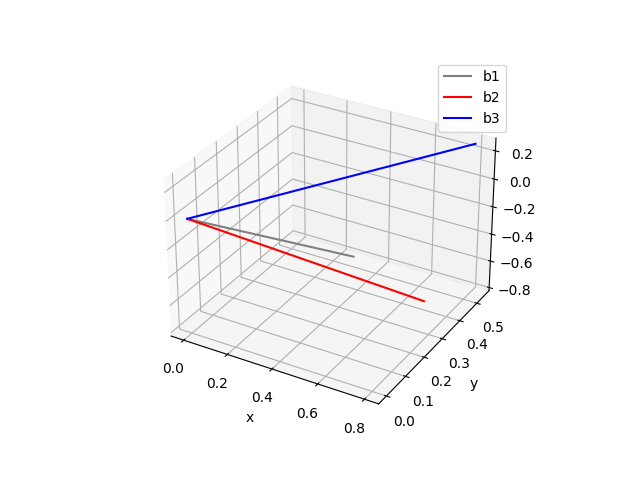

In [39]:
x = 3
y = 2
z = 1

mag = sqrt(x**2+y**2+z**2)

ifig=1;close(ifig);figure(ifig)
ax = plt.axes(projection='3d')

b1x = [0,z/mag]
b1y = [0,y/mag]
b1z = [0,-x/mag]
ax.plot3D(b1x, b1y, b1z, 'gray',label='b1')

b2x = [0,x/mag]
b2y = [0,z/mag]
b2z = [0,-y/mag]
ax.plot3D(b2x, b2y, b2z, 'r',label='b2')

b3x = [0,x/mag]
b3y = [0,y/mag]
b3z = [0,z/mag]
ax.plot3D(b3x, b3y, b3z, 'b',label='b3')

xlabel('x')
ylabel('y')
legend()
# zlabel('z')

In [50]:
mat = array([[[z],[y],[-x]],[[x],[z],[-y]],[[x],[y],[z]]])
basis = array([[[1],[0],[0]],[[0],[1],[0]],[[0],[0],[1]]])
mat.T.dot(basis[0])

array([[[ 1],
        [ 2],
        [-3]]])

In [40]:
A = array([[[-0.0101010,  0.,          0.,        ],[ 0.,         -0.01010101,  0.,        ],[-0.,         -0.,         -0.01010101]]])
v = matrix([0,0,1])
print(v.T)
linalg.solve(A,v)

[[0]
 [0]
 [1]]


matrix([[ -0.        ,  -0.        , -99.00000099]])

In [57]:
A=np.array([[1,2],[1,1]])
u=np.array([3,1])
A.dot(u)

array([5, 4])

In [58]:
v=np.array([5,4])
np.linalg.solve(A,v)

array([3., 1.])

In [83]:
A = np.array([[1,1,1],[-1,1,2],[4,1,7]])
v = np.array([1,2,3])
u = array([ 6,  7, 27])
linalg.solve(A,u)
# A.dot(v)

array([1., 2., 3.])

NotImplementedError: Axes3D currently only supports the aspect argument 'auto'. You passed in 'equal'.

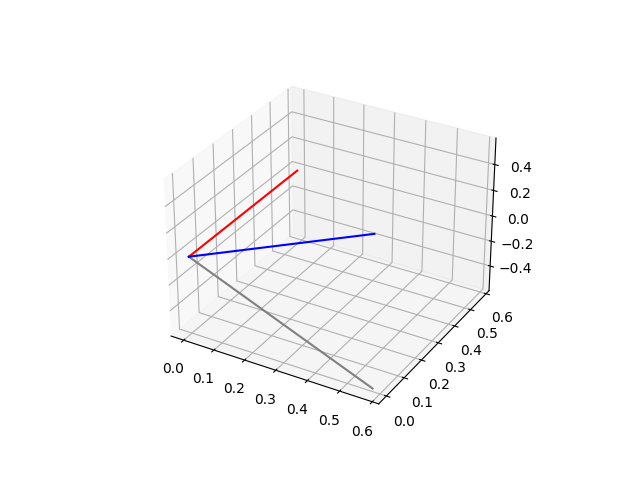

In [36]:
x = 1
y = 1
z = 1

mag = sqrt(x**2+y**2+z**2)

ifig=2;close(ifig);figure(ifig)
ax = plt.axes(projection='3d')

b1x = [0,z/mag]
b1y = [0,0]
b1z = [0,-x/mag]
ax.plot3D(b1x, b1y, b1z, 'gray',label='b1')

b2x = [0,0]
b2y = [0,y/mag]
b2z = [0,0]
ax.plot3D(b2x, b2y, b2z, 'r',label='b2')

b3x = [0,x/mag]
b3y = [0,0]
b3z = [0,z/mag]
ax.plot3D(b3x, b3y, b3z, 'b',label='b3')

ax.set_aspect('equal', adjustable='box')

xlabel('x')
ylabel('y')
legend()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


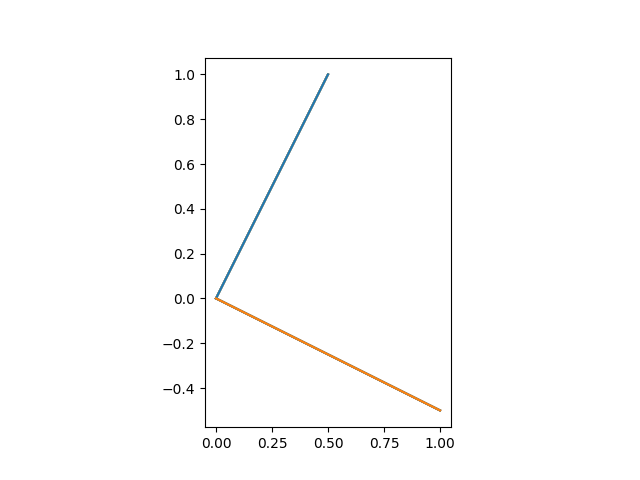

In [35]:
fig = plt.figure(3)
axes = fig.add_subplot(111)
plt.plot([0,0.5],[0,1])
plt.plot([0,1],[0,-0.5])
axes.set_aspect('equal', adjustable='box')
plt.show()

In [2]:
kernel_info = {}
kernel_info['x'] = {}
kernel_info['y'] = {}
kernel_info['z'] = {}

kernel_info['x']['voxel_size'] = 0.1
kernel_info['y']['voxel_size'] = 0.1
kernel_info['z']['voxel_size'] = 0.1

dx,dy,dz = (0.2,0.2,0.2)
x1,x2 = (0,0)
y1,y2 = (0,0)
z1,z2 = (1,-1)
beam_coor = ((x1,x2),(y1,y2),(z1,z2))

delta_x = beam_coor[0][1]-beam_coor[0][0]
delta_y = beam_coor[1][1]-beam_coor[1][0]
delta_z = beam_coor[2][1]-beam_coor[2][0]

CT_basis = np.array([[dx,0,0],[0,dy,0],[0,0,dz]])
pre_rotated_ker = np.array([[kernel_info['x']['voxel_size'],0,0],[0,kernel_info['y']['voxel_size'],0],[0,0,kernel_info['z']['voxel_size']]])

if delta_x == 0 and delta_y == 0 and delta_z == 0:
    raise ValueError('Beam cannot have magnitude of 0.')
elif delta_x == 0 and delta_y == 0:
    kernel_basis = pre_rotated_ker
elif delta_z == 0 and delta_x == 0:
    kernel_basis = np.array([pre_rotated_ker[0],-pre_rotated_ker[2],pre_rotated_ker[1]])
elif delta_z == 0 and delta_y == 0:
    kernel_basis = np.array([-pre_rotated_ker[2],pre_rotated_ker[1],pre_rotated_ker[0]])
else:
    Rx = np.array([[1,0,0],[0,delta_z/np.sqrt(delta_y**2+delta_z**2),-delta_y/np.sqrt(delta_y**2+delta_z**2)],[0,delta_y/np.sqrt(delta_y**2+delta_z**2),delta_z/np.sqrt(delta_y**2+delta_z**2)]])
    Ry = np.array([[delta_x/np.sqrt(delta_x**2+delta_z**2),0,delta_z/np.sqrt(delta_x**2+delta_z**2)],[0,1,0],[-delta_z/np.sqrt(delta_x**2+delta_z**2),0,delta_x/np.sqrt(delta_x**2+delta_z**2)]])
    Rz = np.array([[delta_x/np.sqrt(delta_x**2+delta_y**2),-delta_y/np.sqrt(delta_x**2+delta_y**2),0],[delta_y/np.sqrt(delta_x**2+delta_y**2),delta_x/np.sqrt(delta_x**2+delta_y**2),0],[0,0,1]])
    kernel_basis = np.array([Rx.dot(Ry.dot(Rz.dot(pre_rotated_ker[0]))),Rx.dot(Ry.dot(Rz.dot(pre_rotated_ker[1]))),Rx.dot(Ry.dot(Rz.dot(pre_rotated_ker[2])))])
kernel_coors_mat = []
for vec in CT_basis:
    kernel_coors_mat.append(linalg.solve(kernel_basis.T,vec))
kernel_coors_mat = np.array(kernel_coors_mat).T

kernel_basis,kernel_coors_mat


(array([[0.1, 0. , 0. ],
        [0. , 0.1, 0. ],
        [0. , 0. , 0.1]]),
 array([[2., 0., 0.],
        [0., 2., 0.],
        [0., 0., 2.]]))

In [6]:
# voxel_diff[0] = (voxel_array[n][0] - (voxel_info['indices'][0]-1))
# voxel_diff[1] = (voxel_array[n][1] - (voxel_info['indices'][1]-1))
# voxel_diff[2] = (voxel_array[n][2] - (voxel_info['indices'][2]-1))
voxel_diff = np.array([0,0,-1])

kernel_diff = kernel_coors_mat.dot(voxel_diff)

# print(kernel_diff[0],kernel_diff[1],kernel_diff[2])
kernel_diff

array([ 0.,  0., -2.])